BY: https://github.com/AssanaliAbu/Hand-Gesture-Recognition

In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# Specify data paths
dataset = 'labels.csv'
model_save_path = 'gesture_detection_model.hdf5'

# Set number of classes

In [4]:
# Change training classes if necessary
NUM_CLASSES = 5

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 795,  795, 1116,  808,  781]))


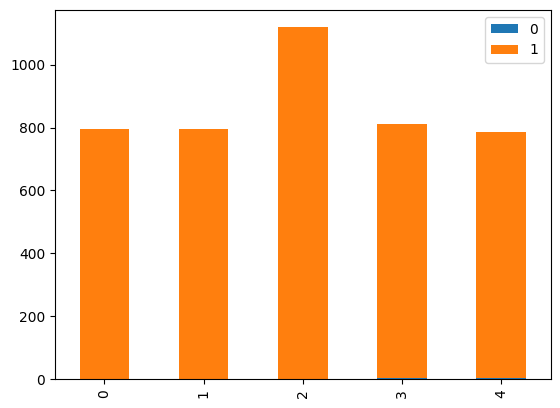

In [9]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 32)                1376      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 8

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/40


2022-12-21 16:46:52.704859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/51 [..............................] - ETA: 11s - loss: 1.6167 - accuracy: 0.2656
Epoch 1: val_loss improved from inf to 1.47862, saving model to keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 3ms/step - loss: 1.5372 - accuracy: 0.3632 - val_loss: 1.4786 - val_accuracy: 0.4544
Epoch 2/40
 1/51 [..............................] - ETA: 0s - loss: 1.4419 - accuracy: 0.5000
Epoch 2: val_loss improved from 1.47862 to 1.23444, saving model to keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 1ms/step - loss: 1.3598 - accuracy: 0.4688 - val_loss: 1.2344 - val_accuracy: 0.5214
Epoch 3/40
 1/51 [..............................] - ETA: 0s - loss: 1.1592 - accuracy: 0.5938
Epoch 3: val_loss improved from 1.23444 to 0.87270, saving model to keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 1ms/step - loss: 1.0553 - accuracy: 0.7165 - val_loss: 0.8727 - val_accuracy: 0.8352
Epoch 

In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

17/17 [==============================] - 0s 477us/step - loss: 0.0163 - accuracy: 0.9981


In [15]:
import tensorflow 
from tensorflow.keras.models import load_model

In [16]:
model = load_model(model_save_path)

# Confusion matrix

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

ModuleNotFoundError: No module named 'seaborn'